In [1]:
# Import necessary packages

import polars as pl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read weights

weights = pl.read_parquet('../signal_weights.parquet')
data = pl.read_parquet('../russell_3000_daily.parquet')

In [3]:
data

date,barrid,ticker,price,return,specific_return,specific_risk,historical_beta,predicted_beta,market_cap,daily_volume,bid_ask_spread
date,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64
2013-07-31,"""USA06Z1""","""MDXG""",6.26,-0.1595,-0.788,55.056916,0.328385,0.34349,6.006157e8,121693.0,0.01
2013-08-01,"""USA06Z1""","""MDXG""",6.32,0.9585,0.365,55.028021,0.334989,0.353329,6.0865392e8,131728.0,0.01
2013-08-02,"""USA06Z1""","""MDXG""",6.31,-0.1582,-0.731,54.807402,0.330713,0.363624,6.0769086e8,43252.0,0.01
2013-08-05,"""USA06Z1""","""MDXG""",6.45,2.2187,1.936,54.76671,0.324494,0.356596,6.211737e8,70944.0,0.02
2013-08-06,"""USA06Z1""","""MDXG""",6.29,-2.4806,-0.528,54.692162,0.366323,0.399196,6.0576474e8,77085.0,0.01
…,…,…,…,…,…,…,…,…,…,…,…
2025-09-09,"""USBRKA2""","""GLIBA""",36.225,-0.4261,1.121,20.842679,0.236481,0.302514,1.3226e8,31025.0,0.11
2025-09-10,"""USBRKA2""","""GLIBA""",36.24,0.0414,2.305,20.954701,0.252015,0.29845,1.3231e8,6298.0,0.21
2025-09-11,"""USBRKA2""","""GLIBA""",37.05,2.2351,0.213,21.480703,0.256752,0.31384,1.3527e8,26857.0,0.25


In [4]:
weights

date,barrid,bab_weight,meanrev_weight,momentum_weight
date,str,f64,f64,f64
1995-06-30,"""USAA191""",-1.0844e-20,null,null
1995-06-30,"""USAA1W1""",-9.1201e-22,null,null
1995-06-30,"""USAA1Y1""",-4.8273e-21,null,null
1995-06-30,"""USAA2L1""",-4.2673e-21,null,null
1995-06-30,"""USAA311""",-9.2198e-21,null,null
…,…,…,…,…
2025-09-15,"""USBQZR1""",-6.9890e-22,-1.3553e-20,null
2025-09-15,"""USBRGT1""",-3.7165e-21,-3.4045e-19,null
2025-09-15,"""USBRH21""",-2.6956e-21,-9.9263e-20,null


In [5]:
weights_bab = (
    weights
    .select(["date", "barrid", "bab_weight"])
    .rename({"bab_weight": "weight"})
    .filter(pl.col("weight").is_not_null())
    .with_columns(pl.lit("bab").alias("signal"))
)

weights_meanrev = (
    weights
    .select(["date", "barrid", "meanrev_weight"])
    .rename({"meanrev_weight": "weight"})
    .filter(pl.col("weight").is_not_null())
    .with_columns(pl.lit("meanrev").alias("signal"))
)

weights_momentum = (
    weights
    .select(["date", "barrid", "momentum_weight"])
    .rename({"momentum_weight": "weight"})
    .filter(pl.col("weight").is_not_null())
    .with_columns(pl.lit("momentum").alias("signal"))
)

In [6]:
def task_compute_returns(weights: pl.DataFrame, data: pl.DataFrame) -> pl.DataFrame:
    """ 
    Compute the optimal portfolio returns.

    Args:
        weights (pl.DataFrame): Data frame containing barrid, date, and weight columns.
        data (pl.DataFrame): Data frame containing barrid, date, and return columns

    Returns:
        pl.DataFrame: Data frame containing date, fwd_return, and cumulative_fwd_return_columns
    """
    return (                 
        #this should be data joined onto weights because data is more consistently available than weights
        data
        .join(weights, on=['date', 'barrid'], how='left')
        .select('date', 'barrid', 'weight', 'return')
        .with_columns(
            pl.col('return').truediv(100).alias('return_ratio')
        )
        .sort('barrid', 'date')
        #shift return_ratios back to line them up with the signal weights 
        .with_columns(
            pl.col('return_ratio').shift(-1).over('barrid').alias('forward_return')
        )
        .drop_nulls('forward_return')
        .sort('date')
        .with_columns(
            pl.col('forward_return').mul('weight').log1p().alias('daily_log_return')
        )
        .with_columns(
            pl.col('daily_log_return').cum_sum().alias('cum_log_return')
        )
        .with_columns(
            pl.col('cum_log_return').exp().pow(1/29).alias('average yearly return')
        )
    )  

In [7]:
returns_bab = task_compute_returns(weights_bab, data)

returns_bab

date,barrid,weight,return,return_ratio,forward_return,daily_log_return,cum_log_return,average yearly return
date,str,f64,f64,f64,f64,f64,f64,f64
1995-06-30,"""USAA191""",-1.0844e-20,5.1471,0.051471,-0.013986,1.5166e-22,1.5166e-22,1.0
1995-06-30,"""USAA1W1""",-9.1201e-22,5.7971,0.057971,0.0,-0.0,1.5166e-22,1.0
1995-06-30,"""USAA1Y1""",-4.8273e-21,2.8777,0.028777,-0.017483,8.4396e-23,2.3606e-22,1.0
1995-06-30,"""USAA2L1""",-4.2673e-21,3.6585,0.036585,0.002941,-1.2550e-23,2.2351e-22,1.0
1995-06-30,"""USAA311""",-9.2198e-21,2.0134,0.020134,-0.006579,6.0657e-23,2.8416e-22,1.0
…,…,…,…,…,…,…,…,…
2025-09-12,"""USBQZR1""",-7.1596e-8,4.2226,0.042226,-0.041651,2.9821e-9,3.516874,1.128931
2025-09-12,"""USBRGT1""",-2.5436e-7,-3.7279,-0.037279,0.0,-0.0,3.516874,1.128931
2025-09-12,"""USBRH21""",-1.8710e-7,-0.6405,-0.006405,0.011281,-2.1106e-9,3.516874,1.128931


In [8]:
returns_meanrev = task_compute_returns(weights_meanrev, data)

returns_meanrev

date,barrid,weight,return,return_ratio,forward_return,daily_log_return,cum_log_return,average yearly return
date,str,f64,f64,f64,f64,f64,f64,f64
1995-06-30,"""USAA191""",null,5.1471,0.051471,-0.013986,null,null,null
1995-06-30,"""USAA1W1""",null,5.7971,0.057971,0.0,null,null,null
1995-06-30,"""USAA1Y1""",null,2.8777,0.028777,-0.017483,null,null,null
1995-06-30,"""USAA2L1""",null,3.6585,0.036585,0.002941,null,null,null
1995-06-30,"""USAA311""",null,2.0134,0.020134,-0.006579,null,null,null
…,…,…,…,…,…,…,…,…
2025-09-12,"""USBQZR1""",-6.9824e-20,4.2226,0.042226,-0.041651,2.9082e-21,10.071001,1.415207
2025-09-12,"""USBRGT1""",-7.2590e-19,-3.7279,-0.037279,0.0,-0.0,10.071001,1.415207
2025-09-12,"""USBRH21""",-2.3251e-19,-0.6405,-0.006405,0.011281,-2.6230e-21,10.071001,1.415207


In [9]:
returns_momentum = task_compute_returns(weights_momentum, data)

returns_momentum

date,barrid,weight,return,return_ratio,forward_return,daily_log_return,cum_log_return,average yearly return
date,str,f64,f64,f64,f64,f64,f64,f64
1995-06-30,"""USAA191""",null,5.1471,0.051471,-0.013986,null,null,null
1995-06-30,"""USAA1W1""",null,5.7971,0.057971,0.0,null,null,null
1995-06-30,"""USAA1Y1""",null,2.8777,0.028777,-0.017483,null,null,null
1995-06-30,"""USAA2L1""",null,3.6585,0.036585,0.002941,null,null,null
1995-06-30,"""USAA311""",null,2.0134,0.020134,-0.006579,null,null,null
…,…,…,…,…,…,…,…,…
2025-09-12,"""USBQZR1""",null,4.2226,0.042226,-0.041651,null,null,null
2025-09-12,"""USBRGT1""",null,-3.7279,-0.037279,0.0,null,null,null
2025-09-12,"""USBRH21""",null,-0.6405,-0.006405,0.011281,null,null,null


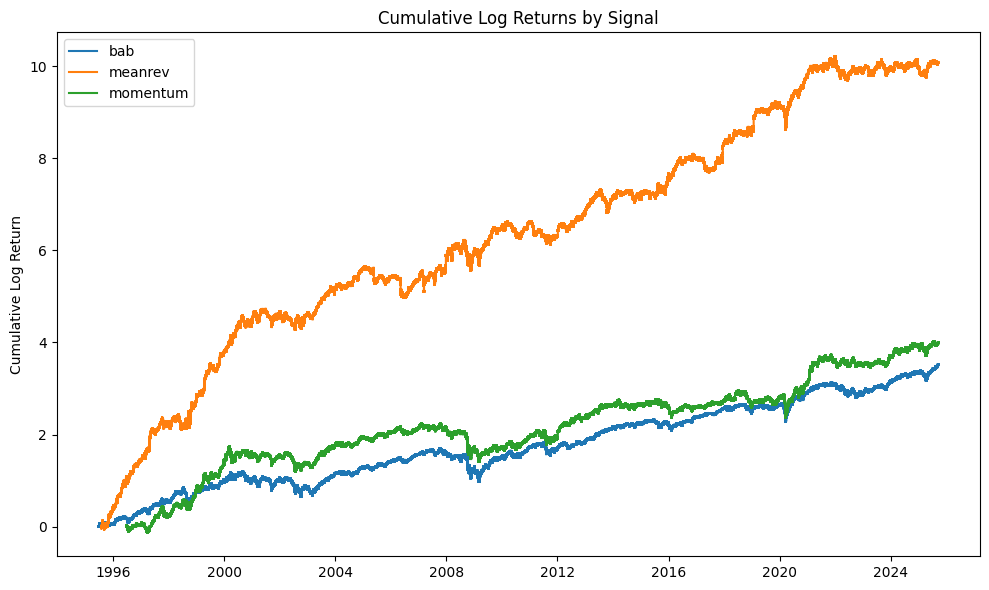

In [10]:
plt.figure(figsize=(10, 6))

# Plot each signal separately
plt.plot(returns_bab["date"], returns_bab["cum_log_return"], label="bab")
plt.plot(returns_meanrev["date"], returns_meanrev["cum_log_return"], label="meanrev")
plt.plot(returns_momentum["date"], returns_momentum["cum_log_return"], label="momentum")

# Labels & legend
plt.xlabel(None)
plt.ylabel("Cumulative Log Return")
plt.title("Cumulative Log Returns by Signal")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [28]:
signal_momentum = (
    returns_momentum
    .group_by("date")
    .agg(pl.col("daily_log_return").sum().alias("momentum_return"))
    .sort("date")
)

signal_bab = (
    returns_bab
    .group_by("date")
    .agg(pl.col("daily_log_return").sum().alias("bab_return"))
    .sort("date")
)

signal_meanrev = (
    returns_meanrev
    .group_by("date")
    .agg(pl.col("daily_log_return").sum().alias("meanrev_return"))
    .sort("date")
)

In [ ]:
# signal_momentum.write_parquet("signal_momentum.parquet")
# signal_bab.write_parquet("signal_bab.parquet")
# signal_meanrev.write_parquet("signal_meanrev.parquet")

In [11]:
def compute_sharpe_ratio(df: pl.DataFrame, return_col: str = "daily_log_return") -> float:
    """
    Compute annualized Sharpe ratio from daily returns.
    Aggregates to daily signal returns (equal-weighted across barrid).
    """
    # Aggregate per date
    signal_returns = (
        df.group_by("date")
          .agg(pl.col(return_col).sum().alias("signal_return"))
    )

    # Mean and std
    stats = (
        signal_returns.select([
            pl.col("signal_return").mean().alias("mean_return"),
            pl.col("signal_return").std(ddof=1).alias("std_return")
        ])
        .to_dicts()[0]
    )

    mean_return = stats["mean_return"]
    std_return = stats["std_return"]

    # Daily and annualized Sharpe
    sharpe_annualized = (mean_return / std_return) * np.sqrt(252)

    return sharpe_annualized

In [12]:
compute_sharpe_ratio(returns_bab), compute_sharpe_ratio(returns_meanrev), compute_sharpe_ratio(returns_momentum)

(np.float64(0.5916097239570509),
 np.float64(1.0060167434103364),
 np.float64(0.539618615477161))